In [220]:
pylab inline

SyntaxError: invalid syntax (<ipython-input-220-b794e5809f34>, line 1)

In [598]:
try:
    reload(dc)
    print  'dc reloaded'
except Exception:
    print 'dc not loaded yet'
    

dc reloaded


In [599]:
WORDSIZE = 32
import dnnConnectivityAndMemoryAllocation as dc

# Create memory
memory = dc.Memory(2,32,8,4096)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
#network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   10,   11,  11,    3,   4 ) #   96,
network.addLayer('Input',           55,  55,    3,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    5,    5,   5,    3,   2 ) #  256,
network.addLayer('Convolutional',   13,  13,   10,    3,   3,    5,   2 ) #  384,
#network.addLayer('Convolutional',   13,  13,    8,    3,   3,   10,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,

network.assignPEs()






Layer  0  left Kernel offset is  0 , top Kernel offset is  0
Layer  1  left Kernel offset is  -1 , top Kernel offset is  -1
Layer  2  left Kernel offset is  0 , top Kernel offset is  0


In [600]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

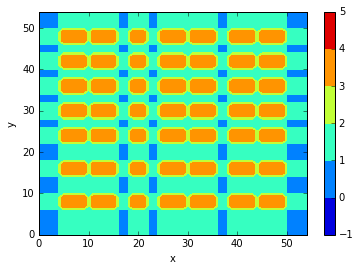

In [601]:
network.Layers[0].displayTargetPECounts()


In [602]:
lid = 0
numOfPEs = network.Layers[lid].getTargetPECounts()


In [603]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
#print numOfPEs
np.set_printoptions(threshold=1000)



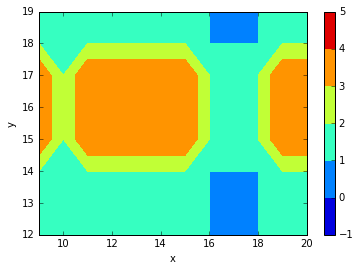

In [604]:
#region = np.array([50,65,45,65])
region = np.array([12,20,9,21])
network.Layers[0].displayTargetPECountsRegion(region)

In [605]:
layerID = 1
for peY in range(network.peY) :
  for peX in range(network.peX) :
    network.peArray.pe[peY][peX].findROI(layerID)
    print network.peArray.pe[peY][peX]
    network.managerArray.manager[peY][peX].memCpyROI(layerID)



PE 0,0               
layer0 Not calculated 
layer1 roi coords: [0 0 0],[2 9 9] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[0 0 0]
 [2 9 9]]

PE 0,1               
layer0 Not calculated 
layer1 roi coords: [0 0 5],[ 2  9 15] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0  5]
 [ 2  9 15]]

PE 0,2               
layer0 Not calculated 
layer1 roi coords: [ 0  0 11],[ 2  9 21] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              
[[ 0  0 11]
 [ 2  9 21]]

PE 0,3               
layer0 Not calculated 
layer1 roi coords: [ 0  0 19],[ 2  9 29] 


In [606]:
tempZ = network.managerArray.manager[4][4].roiCells[1][1][0][0].Z
tempY = network.managerArray.manager[4][4].roiCells[1][1][0][0].Y
tempX = network.managerArray.manager[4][4].roiCells[1][1][0][0].X
network.managerArray.manager[4][4].roiCells[1][1][0][0]


<dnnConnectivityAndMemoryAllocation.Cell instance at 0x13e6a0e60>

In [607]:
print network.managerArray.manager[4][4].roiCells[1][1][0][0]


Cell:1,29,25                                               
Layer:0                                                      
PE{Y,X} : 4,3                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'copiedTo', 'kernel', 'memoryLocation', 'layerID', 'Y', 'X', 'Z', 'originalCell', 'roiFromSrcCells', 'targetCells', 'parentLayer', 'targetPEs', 'sourcePEs', 'PE', 'sourceCells']                                                    


In [608]:
network.managerArray.manager[4][4].roiCells[1][1][0][0].memoryLocation

<dnnConnectivityAndMemoryAllocation.MemoryLocation instance at 0x13e6a0ea8>

In [609]:
network.managerArray.manager[4][4].roiCells[1][1][0][0].originalCell

<dnnConnectivityAndMemoryAllocation.Cell instance at 0x13cbbdcb0>

In [610]:
network.Layers[0].cells[tempZ][tempY][tempX]

<dnnConnectivityAndMemoryAllocation.Cell instance at 0x13cbbdcb0>

In [611]:
print network.Layers[0].cells[tempZ][tempY][tempX]


Cell:1,29,25                                               
Layer:0                                                      
PE{Y,X} : 4,3                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [612]:
network.Layers[0].cells[tempZ][tempY][tempX].memoryLocation

<dnnConnectivityAndMemoryAllocation.MemoryLocation instance at 0x13cbbdea8>

In [613]:
network.Layers[0].cells[tempZ][tempY][tempX].copiedTo

[<dnnConnectivityAndMemoryAllocation.Cell instance at 0x13e4cd4d0>,
 <dnnConnectivityAndMemoryAllocation.Cell instance at 0x13e5023b0>,
 <dnnConnectivityAndMemoryAllocation.Cell instance at 0x13e66bf80>,
 <dnnConnectivityAndMemoryAllocation.Cell instance at 0x13e6a0e60>]

In [614]:
network.managerArray.manager[0][0].allocateMemory(memory,layerID)
for y in range(network.managerArray.manager[0][0].roiCells[layerID][0].__len__()):
  for x in range(network.managerArray.manager[0][0].roiCells[layerID][0][0].__len__()):
    for z in range(network.managerArray.manager[0][0].roiCells[layerID].__len__()):
        print network.managerArray.manager[0][0].roiCells[layerID][z][y][x]



Cell:0,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'copiedTo', 'kernel', 'memoryLocation', 'layerID', 'Y', 'X', 'Z', 'originalCell', 'roiFromSrcCells', 'targetCells', 'parentLayer', 'targetPEs', 'sourcePEs', 'PE', 'sourceCells']                                                    

Cell:1,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:1,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                

In [615]:
print network.Layers[1].cells[0][25][25]



Cell:0,25,25                                               
Layer:1                                                      
PE{Y,X} : 7,7                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 49 49] [ 2 53 53] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [616]:
print network.peArray.pe[3][3].getROI(1)

[[ 0 23 19]
 [ 2 31 29]]


In [623]:
layerID = 1
x = 3
y = 4
print network.managerArray.manager[y][x]
print network.managerArray.manager[y][x].pe
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] :
  nv = c.findROI()
  print c

    






Manager 4,3 
Methods: ['allocateMemory', 'memCpyROI']    
Fields: ['roiCells', 'ID', 'parentManagerArray', 'pe']     

PE 4,3               
layer0 Not calculated 
layer1 roi coords: [ 0 29 19],[ 2 37 29] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              

Cell:0,15,10                                               
Layer:1                                                      
PE{Y,X} : 4,3                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 29 19] [ 2 33 23] || [ 0 29 19],[ 2 33 23]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalC

In [624]:
x += 1
print network.managerArray.manager[y][x]
print network.managerArray.manager[y][x].pe
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] :
  nv = c.findROI()
  print c


Manager 4,4 
Methods: ['allocateMemory', 'memCpyROI']    
Fields: ['roiCells', 'ID', 'parentManagerArray', 'pe']     

PE 4,4               
layer0 Not calculated 
layer1 roi coords: [ 0 29 25],[ 2 37 35] 
layer2 Not calculated 
Methods: ['addCell', 'findCellsProcessedRegion', 'findROI', 'getROI']             
Fields: ['roi', 'cellsProcessed', 'parentPEarray', 'ID', 'processedRegion']              

Cell:2,15,13                                               
Layer:1                                                      
PE{Y,X} : 4,4                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 29 25] [ 2 33 29] || [ 0 29 25],[ 2 33 29]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalC

In [618]:
for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID][0].sourceCells :
  print c




Cell:0,33,26                                               
Layer:0                                                      
PE{Y,X} : 4,3                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    

Cell:0,33,28                                               
Layer:0                                                      
PE{Y,X} : 4,4                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']            

In [625]:
network.Layers[1].cells[0][25][25].findROI()
print network.Layers[1].cells[0][25][25]


Cell:0,25,25                                               
Layer:1                                                      
PE{Y,X} : 7,7                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [ 0 49 49] [ 2 53 53] || [ 0 49 49],[ 2 53 53]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'targetPEs', 'copiedTo', 'kernel', 'targetCells', 'layerID', 'parentLayer', 'sourceCells', 'roiFromSrcCells', 'memoryLocation', 'sourcePEs', 'PE', 'Y', 'X', 'Z', 'originalCell']                                                    


In [638]:
type(network.Layers[1].cells[0][25][25].roi)
type(network.peArray.pe[0][0].findROI(layerID))
type(network.peArray.pe[0][0].roi[1])

numpy.ndarray